In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample_submission = pd.read_csv("./data/sample_submission.csv")
print(train.shape)
print(test.shape)
train.shape[0]

(7160, 184)
(1791, 183)


7160

In [3]:
data = pd.concat([train.iloc[:,:-1],test],axis=0)
print('tha data has {} rows and {} features'.format(data.shape[0],data.shape[1]))

tha data has 8951 rows and 184 features


In [4]:
# drop_list = ['appearedHour', 'appearedMinute', 'appearedTimeOfDay', 'gymDistanceKm',\
#              'population_density', 'pressure', 'terrainType','continent', 'weatherIcon']
# my_drop_list = ['population_density']
# data = data.drop(drop_list, axis=1)

In [5]:
int_features = data.select_dtypes(include=['int64'])
float_features = data.select_dtypes(include=['float64'])
bool_features = data.select_dtypes(include=['bool'])
categorical_features = data.select_dtypes(include='object')

In [6]:
# setting hyperparameter
batch_size = 32
epochs = 100
lr = 0.01
train_ratio = 0.9

In [7]:
categorical_features = categorical_features.drop(["ID","id"], axis=1)

In [8]:
categorical_features.head()

,appearedTimeOfDay,city,continent,weather,weatherIcon
0,evening,Bangkok,Asia,Clear,clear-day
1,night,New_York,America,Clear,clear-night
2,evening,New_York,America,Clear,clear-day
3,morning,Hobart,Australia,Clear,clear-night
4,evening,Los_Angeles,America,PartlyCloudy,partly-cloudy-day


In [9]:
dummies_df=pd.DataFrame()
# object_features = categorical_features.select_dtypes(include='object').columns
for name in categorical_features:
    print(name)
    dummies = pd.get_dummies(categorical_features[name], drop_first=False)
    dummies = dummies.add_prefix("{}_".format(name))
    dummies_df=pd.concat([dummies_df,dummies],axis=1)

appearedTimeOfDay
city
continent
weather
weatherIcon


In [10]:
print(dummies_df.shape)
print(bool_features.shape)
print(float_features.shape)
print(int_features.shape)

(8951, 121)
(8951, 168)
(8951, 6)
(8951, 3)


In [11]:
for i in float_features.columns:
    print(i)

gymDistanceKm
pokestopDistanceKm
population_density
pressure
temperature
windSpeed


In [12]:
def my_01_transform(x):
    if x > 0.5:
        return 1
    else:
        return 0

In [13]:
# float1 gymDistanceKm

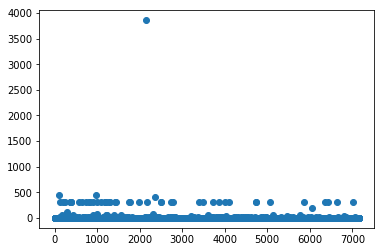

In [14]:
plt.scatter(float_features.index.values,float_features['gymDistanceKm'])
plt.show()

In [15]:
def gymDistanceKm_transform(x):
    if x >= 1:
        return 1
    else:
        return x

In [16]:
float_features['gymDistanceKm'] = float_features['gymDistanceKm']\
.transform(gymDistanceKm_transform)

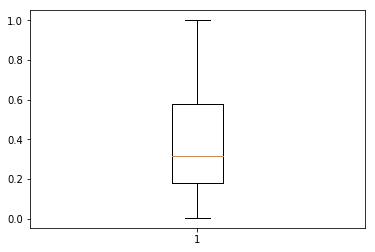

In [17]:
a = float_features['gymDistanceKm']
ax1 = plt.subplot()
ax1.boxplot(a)
plt.show()

In [18]:
# float_features['gymDistanceKm'] = float_features['gymDistanceKm']\
# .transform(my_01_transform)

In [19]:
#float2 pokestopDistanceKm

In [20]:
float_features['pokestopDistanceKm'] = float_features['pokestopDistanceKm'].transform(lambda x: x**0.5)

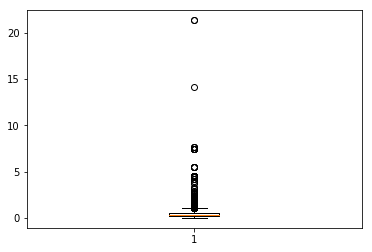

In [21]:
a = float_features['pokestopDistanceKm']
ax1 = plt.subplot()
ax1.boxplot(a)
plt.show()

In [22]:
# float_features.loc[(float_features['gymDistanceKm']<150), 'gymDistanceKm'] = 0
# float_features.loc[(float_features['gymDistanceKm']>150), 'gymDistanceKm'] = 1

In [23]:
# plt.scatter(float_features.index.values,float_features['gymDistanceKm'])
# plt.show()

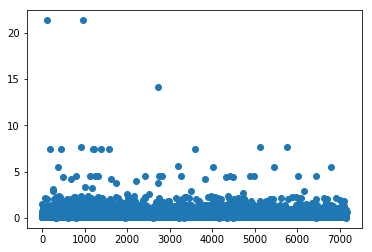

In [24]:
plt.scatter(float_features.index.values,float_features['pokestopDistanceKm'])
plt.show()

In [25]:
def pokestopDistanceKm_transform(x):
    if x >= 1:
        return 1
    else:
        return x

In [26]:
float_features['pokestopDistanceKm'] = float_features['pokestopDistanceKm']\
.transform(pokestopDistanceKm_transform)

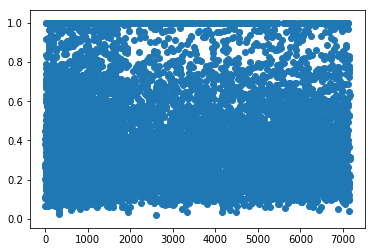

In [27]:
plt.scatter(float_features.index.values,float_features['pokestopDistanceKm'])
plt.show()

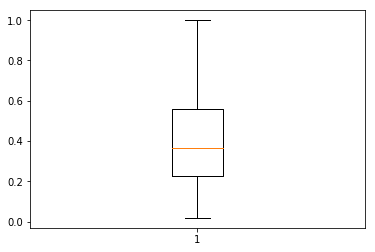

In [28]:
a = float_features['pokestopDistanceKm']
ax1 = plt.subplot()
ax1.boxplot(a)
plt.show()

In [29]:
float_features['pokestopDistanceKm'] = float_features['pokestopDistanceKm'].transform(lambda x: x**0.5)

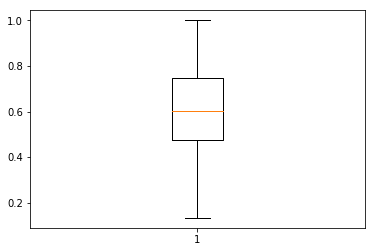

In [30]:
a = float_features['pokestopDistanceKm']
ax1 = plt.subplot()
ax1.boxplot(a)
plt.show()

In [31]:
# float_features['pokestopDistanceKm'] = float_features['pokestopDistanceKm']\
# .transform(my_01_transform)

In [32]:
#float3 population_density

In [33]:
def zero_to_None(x):
    if x == 0:
        x = None
    else:
        pass
    return x

In [34]:
data['population_density'] = data['population_density'].transform(zero_to_None)

In [35]:
float_features['population_density'] = data.groupby("city")['population_density'].transform(lambda x: x.fillna(x.median()))
float_features.loc[:,['population_density']].head()

,population_density
0,6019.04440
1,591.08990
2,591.08990
3,128.89505
4,4188.39100


In [36]:
my_group01 = data.groupby('city')["city",'population_density']
population_density_dict = {}
for i,j in my_group01.groups.items():
    population_density_dict[i] = float_features['population_density'].iloc[j].median()
population_density_dict["New_York"]

591.0899

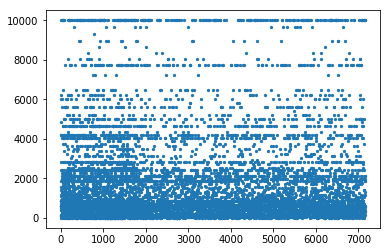

In [37]:
plt.scatter(float_features.index.values,float_features['population_density'],s=5)
plt.show()

In [38]:
float_features.loc[(float_features['population_density'] < 155 ), 'population_density'] = 0

float_features.loc[(float_features['population_density'] >= 155)&\
                   (float_features['population_density'] < 375), 'population_density'] = 0.14
float_features.loc[(float_features['population_density'] >= 375)&\
                   (float_features['population_density'] < 600), 'population_density'] = 0.28
float_features.loc[(float_features['population_density'] >= 600)&\
                   (float_features['population_density'] < 900), 'population_density'] = 0.42
float_features.loc[(float_features['population_density'] >= 900)&\
                   (float_features['population_density'] < 1800), 'population_density'] = 0.56
float_features.loc[(float_features['population_density'] >= 1800)&\
                   (float_features['population_density'] < 2600), 'population_density'] = 0.7
float_features.loc[(float_features['population_density'] >= 2600)&\
                   (float_features['population_density'] < 4600), 'population_density'] = 0.84
float_features.loc[(float_features['population_density'] >= 4600), 'population_density'] = 1



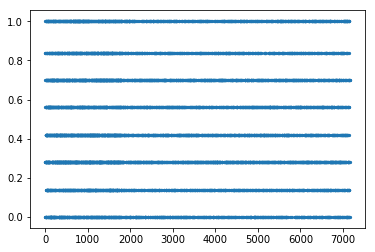

In [39]:
plt.scatter(float_features.index.values,float_features['population_density'],s=5)
plt.show()

In [40]:
# def population_density_transform(x):
#     if x >= 6000:
#         return 6000
#     else:
#         return x

In [41]:
# float_features['population_density'] = float_features['population_density']\
# .transform(population_density_transform)

In [42]:
# float_features['population_density'] = float_features['population_density'].transform(lambda x: x**0.25)

In [43]:
# float_features["population_density"] = float_features["population_density"].apply(lambda x: x/10)

In [44]:
# float_features["population_density"].head()

In [45]:
float_features['population_density'] = float_features['population_density']\
.transform(my_01_transform)

In [46]:
#float4 pressure

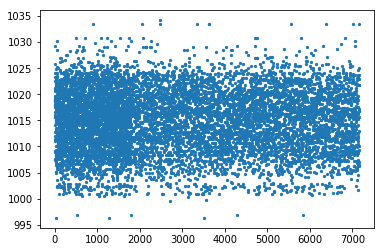

In [47]:
plt.scatter(float_features.index.values,float_features['pressure'],s=5)
plt.show()

In [48]:
def pressure_transform(x):
    if x >= 1025:
        x = 1025
    elif x <= 1005:
        x = 1005
    else:
        x = x
    return (x - 1005)/20
    

In [49]:
float_features['pressure'] = float_features['pressure']\
.transform(pressure_transform)

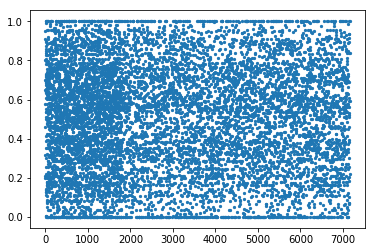

In [50]:
plt.scatter(float_features.index.values,float_features['pressure'],s=5)
plt.show()

In [51]:
# float_features['pressure'] = float_features['pressure']\
# .transform(my_01_transform)

In [52]:
#float5 temperature

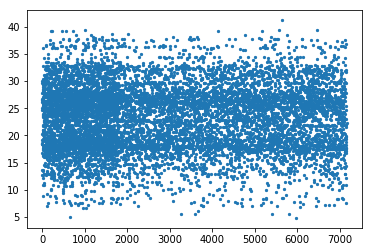

In [53]:
plt.scatter(float_features.index.values,float_features['temperature'],s=5)
plt.show()

In [54]:
def temperature_transform(x):
    if x >= 35:
        x = 35
    elif x <= 10:
        x = 10
    else:
        x = x
    return (x - 10)/25

In [55]:
float_features['temperature'] = float_features['temperature']\
.transform(temperature_transform)

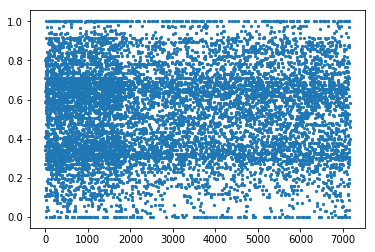

In [56]:
plt.scatter(float_features.index.values,float_features['temperature'],s=5)
plt.show()

In [57]:
# float_features['temperature'] = float_features['temperature']\
# .transform(my_01_transform)

In [58]:
#float6 windSpeed

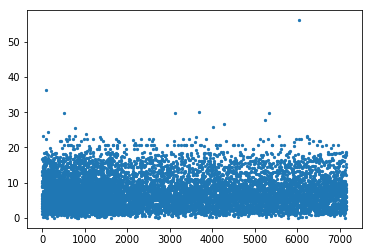

In [59]:
plt.scatter(float_features.index.values,float_features['windSpeed'],s=5)
plt.show()

In [60]:
def windSpeed_transform(x):
    if x >= 18:
        x = 18
    else:
        x = x
    return x/20

In [61]:
float_features['windSpeed'] = float_features['windSpeed']\
.transform(windSpeed_transform)

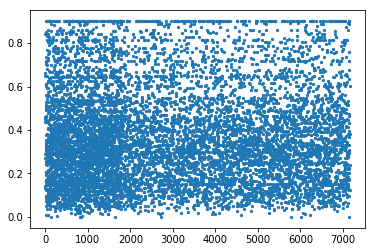

In [62]:
plt.scatter(float_features.index.values,float_features['windSpeed'],s=5)
plt.show()

In [63]:
# float_features['windSpeed'] = float_features['windSpeed']\
# .transform(my_01_transform)

In [64]:
# int_features

In [65]:
for i in int_features.columns:
    print(i)

appearedHour
appearedMinute
terrainType


In [66]:
# int1 appearedHour

In [67]:
int_features['appearedHour'] = int_features['appearedHour']\
.transform(lambda x: x/24)

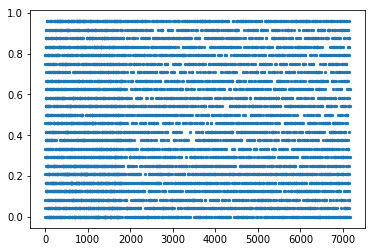

In [68]:
plt.scatter(int_features.index.values,int_features['appearedHour'],s=5)
plt.show()

In [69]:
# int2 appearedMinute

In [70]:
int_features['appearedMinute'] = int_features['appearedMinute']\
.transform(lambda x: x/60)

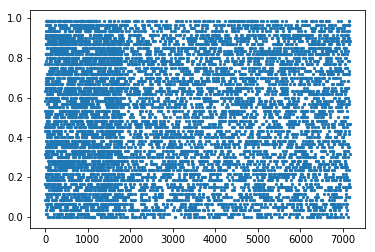

In [71]:
plt.scatter(int_features.index.values,int_features['appearedMinute'],s=5)
plt.show()

In [72]:
a = int_features.groupby('appearedMinute')

In [73]:
# int3 terrainType

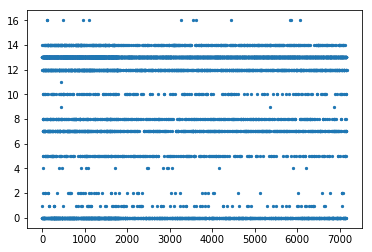

In [74]:
plt.scatter(int_features.index.values,int_features['terrainType'],s=5)
plt.show()

In [75]:
int_features.loc[(int_features['terrainType']==0)|\
                 (int_features['terrainType']==1)|\
                 (int_features['terrainType']==2), 'terrainType'] = 0/7
int_features.loc[(int_features['terrainType']==4)|\
                 (int_features['terrainType']==5), 'terrainType'] = 1/7
int_features.loc[(int_features['terrainType']==7), 'terrainType'] = 2/7
int_features.loc[(int_features['terrainType']==8), 'terrainType'] = 3/7
int_features.loc[(int_features['terrainType']==9)|\
                 (int_features['terrainType']==10)|\
                 (int_features['terrainType']==11), 'terrainType'] = 4/7
int_features.loc[(int_features['terrainType']==12), 'terrainType'] = 5/7
int_features.loc[(int_features['terrainType']==13), 'terrainType'] = 6/7
int_features.loc[(int_features['terrainType']==14)|\
                 (int_features['terrainType']==16), 'terrainType'] = 7/7

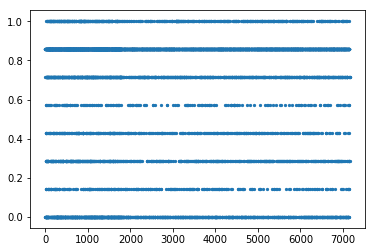

In [76]:
plt.scatter(int_features.index.values,int_features['terrainType'],s=5)
plt.show()

In [77]:
# solution.to_csv('submission_01.csv',index=False)

In [78]:
# save

In [79]:
# x_ = pd.concat([float_features,int_features,bool_features,dummies_df],axis=1)
x_ = pd.concat([int_features,float_features,bool_features,dummies_df],axis=1)
y_ = train.iloc[:,-1]

x_train_preprocessing = x_.iloc[:7160,:]
x_train_preprocessing = pd.concat([x_train_preprocessing,y_],axis=1)

x_test_preprocessing = x_.iloc[7160:,:]

In [80]:
x_train_preprocessing.to_csv('./data/x_train_preprocessing.csv',index=False)
x_test_preprocessing.to_csv('./data/x_test_preprocessing.csv',index=False)